---

Hunter Carroll: Programming Homework 3
---


---

In [1]:
# Library Cell
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
!pip install pandoc

---

**<font color ='red'>Problem 1</font>**

Read in the dataset stored in 'HW3P1.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

**(a) Plot the training data, each class with a different color and marker.**

**(b) Build two linear SVM classifiers, one with $C=1$ and one with $C=100$. Plot the decision boundary for each case along with the training data.**

**(c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries).**

---

In [2]:
# Load in the data and rename columns, 
file_path1 = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/ProgrammingHomework/Homework3Programming/HW3P1.txt'
HW3P1 = pd.read_csv(file_path1, sep=' ', header=None)
HW3P1_columns = ['Feature1', 'Feature2', 'Labels']
HW3P1.columns = HW3P1_columns 
HW3P1.head()

,Feature1,Feature2,Labels
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


---

**<font color ='red'>(a) Plot the training data, each class with a different color and marker.</font>**

---

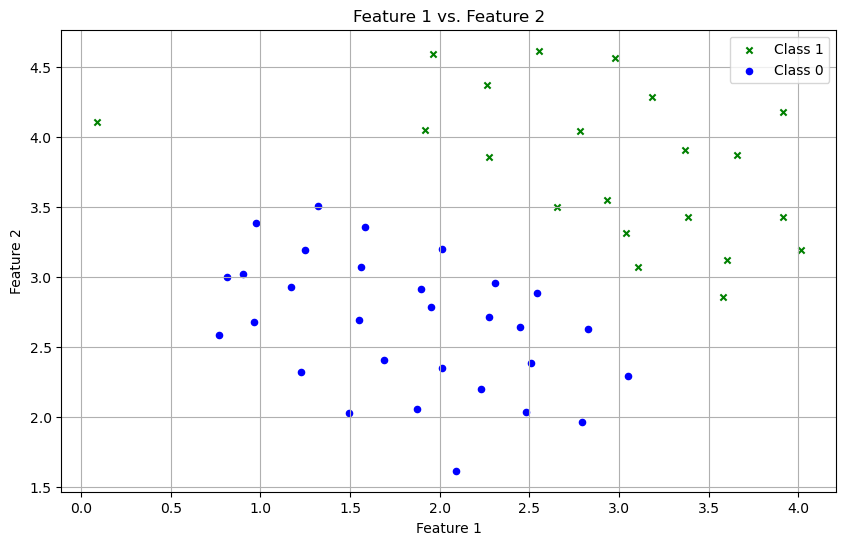

In [3]:
# Set the markers, 
Marker_1 = 'x'
Marker_2 = 'o'

# Subset the data that associates with label =1 and label=0
Label1 = HW3P1[HW3P1['Labels']==1]
Label0 = HW3P1[HW3P1['Labels']!=1]

# Plot the training data
plt.figure(figsize=(10, 6))
plt.scatter(Label1['Feature1'], Label1['Feature2'], marker=Marker_1, c='g', s=20, label='Class 1')
plt.scatter(Label0['Feature1'], Label0['Feature2'], marker=Marker_2, c='b', s=20, label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs. Feature 2')
plt.legend()
plt.grid(True)

---

**<font color ='red'>(b)  Build two linear SVM classifiers, one with $C=1$ and one with $C=100$. Plot the decision boundary for each case along with the training data.</font>**

---

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


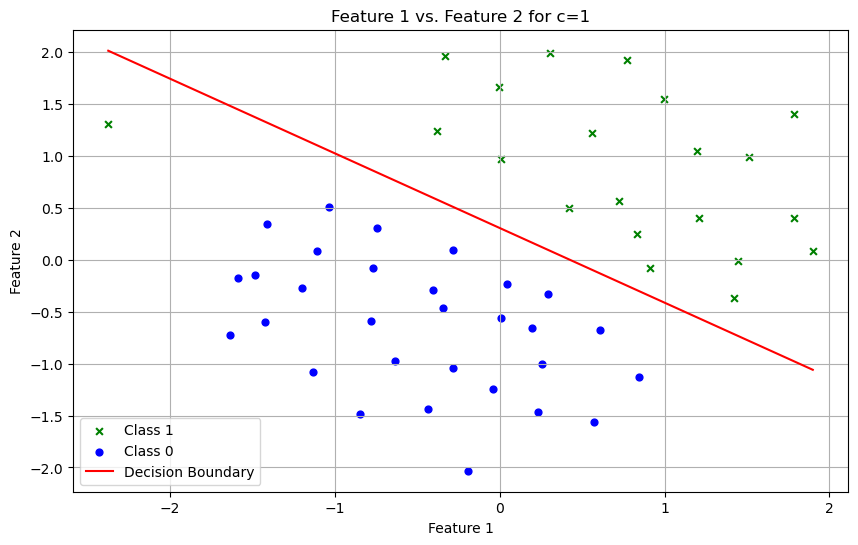

In [4]:
# Seperate features and target variable
X = HW3P1[['Feature1', 'Feature2']]
y = (HW3P1['Labels'] == 1).astype(int)

# Linear SVM Classifier with c=1
svm_clf_c1 = Pipeline([("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge", random_state=36))])

# Train the model
svm_clf_c1.fit(X, y)

# Scale the data and store our intercept and beta 1 and beta 2 (for feature 1 and 2)
X_scaled = svm_clf_c1["scaler"].transform(X)
x_db = [X_scaled[:,0].min(), X_scaled[:,0].max()] 
beta0 = svm_clf_c1["linear_svc"].intercept_[0]
beta1 = svm_clf_c1["linear_svc"].coef_[0][0]
beta2 = svm_clf_c1["linear_svc"].coef_[0][1]
y_db = - (beta0 + np.dot(beta1, x_db)) / beta2


# Plot with decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[HW3P1["Labels"] == 1, 0], X_scaled[HW3P1["Labels"] == 1, 1],
marker='x', c='g', s=24, label='Class 1')
plt.scatter(X_scaled[HW3P1["Labels"] != 1, 0], X_scaled[HW3P1["Labels"] != 1, 1],
marker='o', c='b', s=24, label='Class 0')
plt.plot(x_db, y_db, label='Decision Boundary', c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs. Feature 2 for c=1')
plt.legend()
plt.grid(True)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


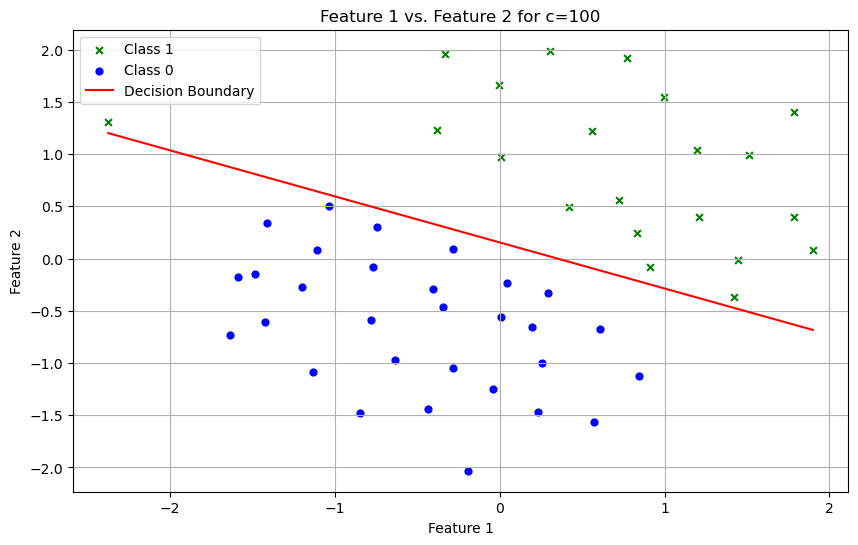

In [5]:
# Seperate features and target variable
X = HW3P1[['Feature1', 'Feature2']]
y = (HW3P1['Labels'] == 1).astype(int)

# Linear SVM Classifier with c=1
svm_clf_c1 = Pipeline([("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=100, loss="hinge", random_state=36))])

# Train the model
svm_clf_c1.fit(X, y)

# Scale the data and store our intercept and beta 1 and beta 2 (for feature 1 and 2)
X_scaled = svm_clf_c1["scaler"].transform(X)
x_db = [X_scaled[:,0].min(), X_scaled[:,0].max()] 
beta0 = svm_clf_c1["linear_svc"].intercept_[0]
beta1 = svm_clf_c1["linear_svc"].coef_[0][0]
beta2 = svm_clf_c1["linear_svc"].coef_[0][1]
y_db = - (beta0 + np.dot(beta1, x_db)) / beta2

# Plot with decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[HW3P1["Labels"] == 1, 0], X_scaled[HW3P1["Labels"] == 1, 1],
marker='x', c='g', s=24, label='Class 1')
plt.scatter(X_scaled[HW3P1["Labels"] != 1, 0], X_scaled[HW3P1["Labels"] != 1, 1],
marker='o', c='b', s=24, label='Class 0')
plt.plot(x_db, y_db, label='Decision Boundary', c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs. Feature 2 for c=100')
plt.legend()
plt.grid(True)

---

**<font color ='red'>(c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries).</font>**

---

**<font color ='red'>My solution:</font>** $C>0$ controls the trade-off between the slack variable penalty and the margin. 

When $C=1$: Here having a lower $C$ value will give our linear SVM model more slack. That is, it will maximize finding a wider margin while being less strict on the penalty applied to points that lie on the wrong side of the margin boundary as seen in the plot for $C=1$ where we have an apparent misclassified data point. 

When $C=100$: Having a higher $C$ value will make our linear SVM model more strict to classification error. That is, it will not only have a more narrow margin but heavily penalize points that lie on the wrong side of the margin boundary as seen in the plot for $C=100$ where our misclassified point now correctly lies on the proper side of the boundary. 

To conclude, a lower $C$ value is more suitable for generalization due to its leniency while a higher $C$ value has increased precision for classification but may lead to overfitting therefore generalizing poorly. For reference, if you look at my plots below showing the margin and decision boundary it is clear for $C=1$ the margin is wide and for $C=100$ the margin is narrow. 


    

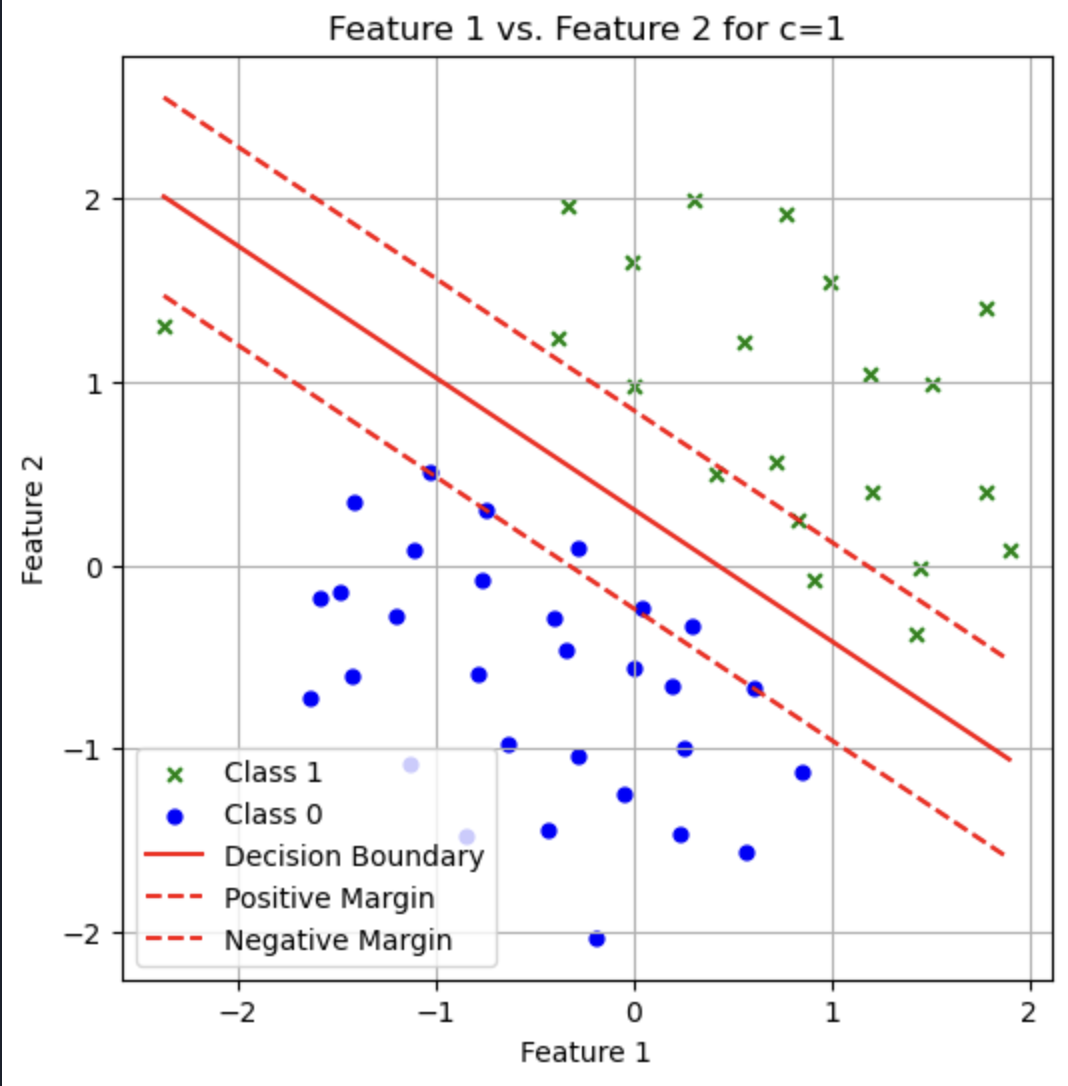

    
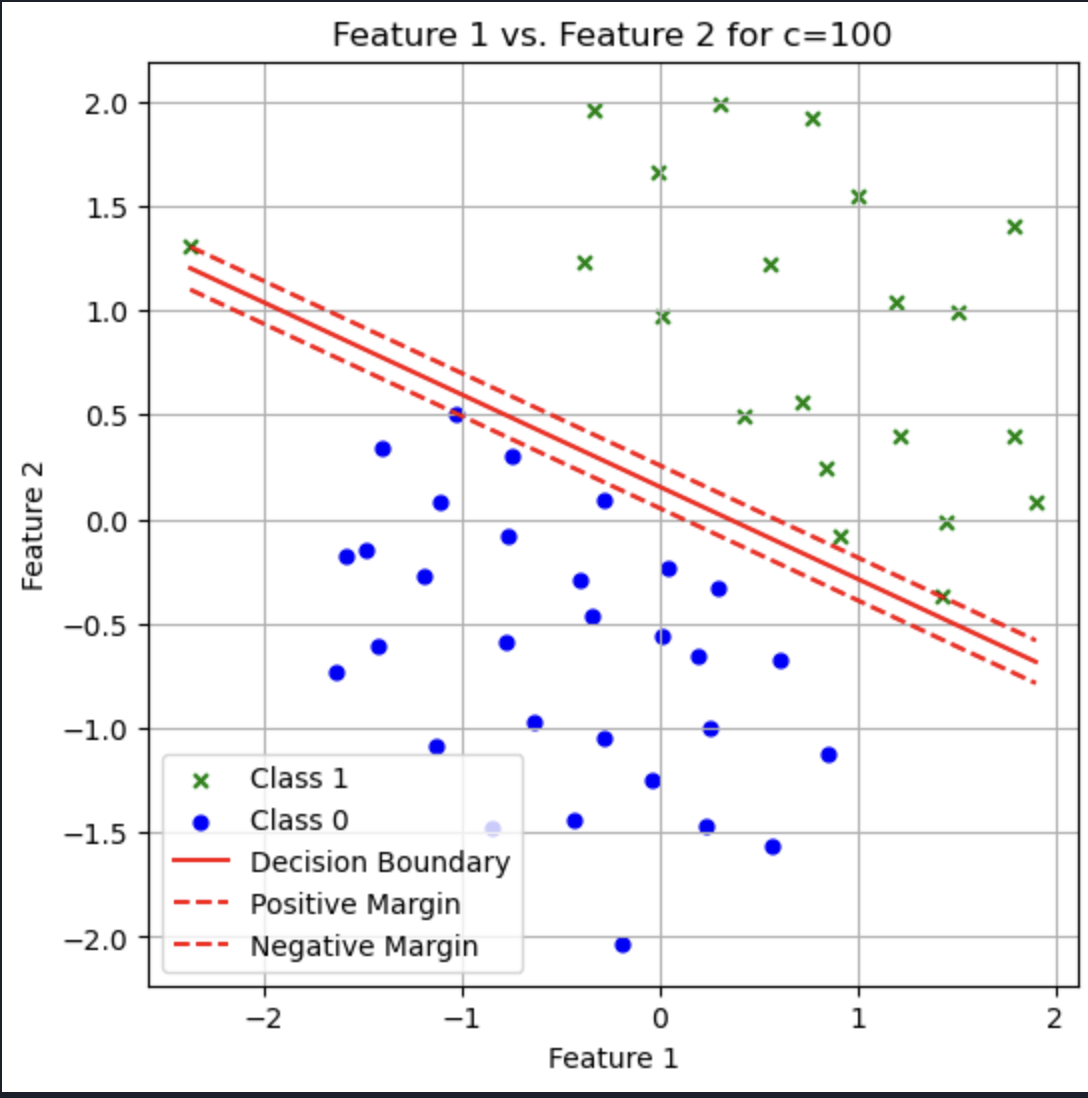

---

---

**<font color ='red'>Problem 2</font>**

Read in the dataset stored in 'HW3P2.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

**(a) Plot the training data, each class with a different color and marker. Is the dataset linearly separable?**

**(b) Train a SVM using the RBF kernel. Adjust the parameter C to learn a decision boundary that performs well. Plot the decsion boundary.**

---

In [6]:
file_path2 = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/ProgrammingHomework/Homework3Programming/HW3P2.txt'
HW3P2 = pd.read_csv(file_path2, sep=' ', header=None)
HW3P2_columns = ['Feature1', 'Feature2', 'Labels']
HW3P2.columns = HW3P2_columns 
HW3P2.head()

,Feature1,Feature2,Labels
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


---

**<font color ='red'>(a) Plot the training data, each class with a different color and marker. Is the dataset linearly separable?</font>**


**No, this data is not linearly separable there exists no linear line in which can separate the two classes in our dataset. In fact, below we will use a Gaussian RBF Kernel (non-linear kernel) in order to plot our decision boundary.**

---


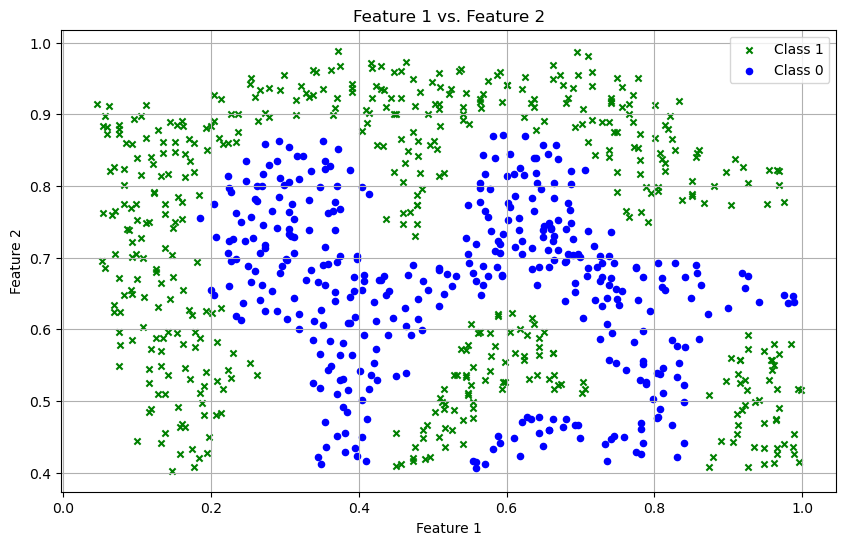

In [7]:
# Set the markers, 
Marker_1 = 'x'
Marker_2 = 'o'

# Subset the data that associates with label =1 and label=0
Label0 = HW3P2[HW3P2['Labels']==0]
Label1 = HW3P2[HW3P2['Labels']==1]

# Plot the training data
plt.figure(figsize=(10, 6))
plt.scatter(Label1['Feature1'], Label1['Feature2'], marker=Marker_1, c='g', s=20, label='Class 1')
plt.scatter(Label0['Feature1'], Label0['Feature2'], marker=Marker_2, c='b', s=20, label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Feature 1 vs. Feature 2')
plt.legend()
plt.grid(True)

---

**<font color ='red'>(b) Train a SVM using the RBF kernel. Adjust the parameter C to learn a decision boundary that performs well. Plot the decsion boundary.</font>**


---

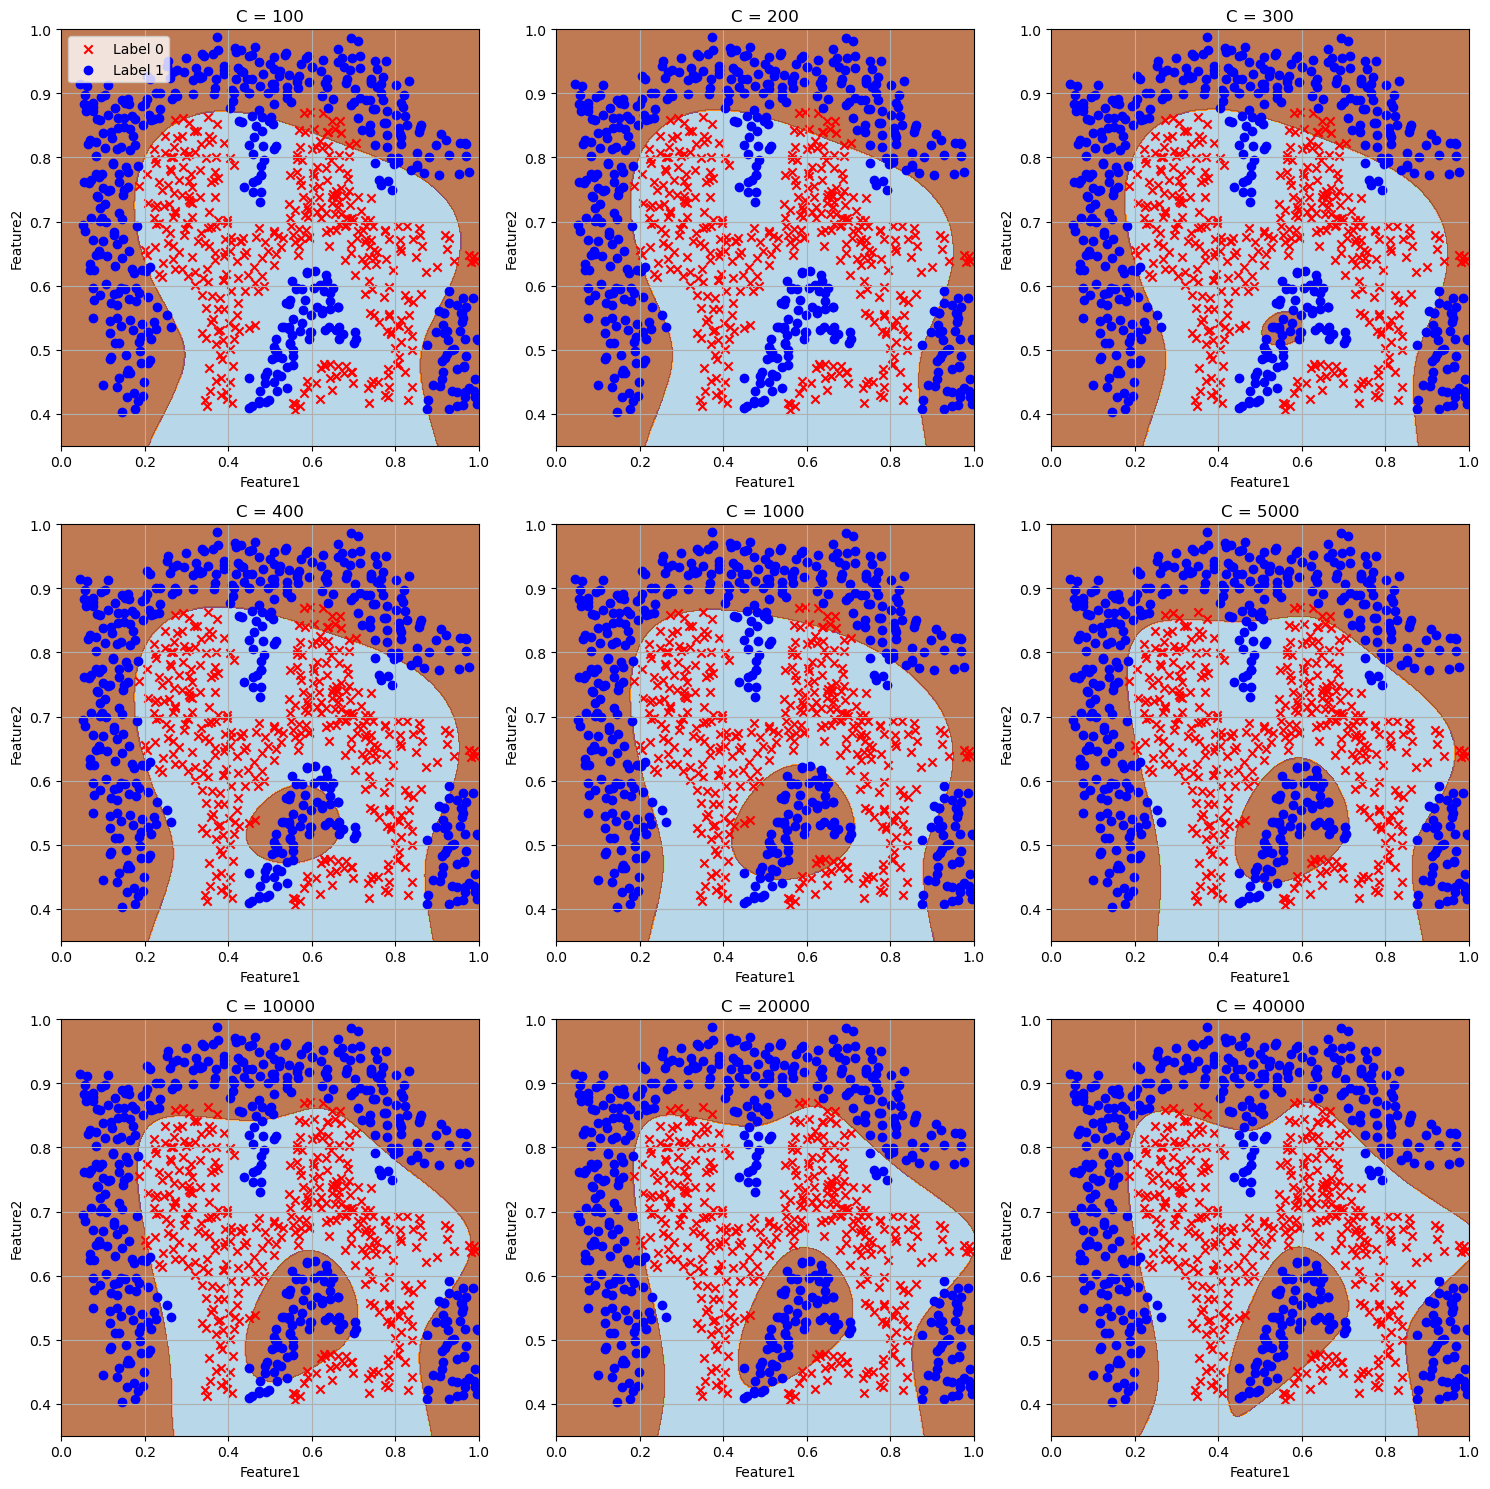

In [10]:
# Our features and target
X = HW3P2[['Feature1', 'Feature2']].values
y = HW3P2['Labels'].values

# Test over multiple C values (9 of them )
C_values = [100,200,300,400,1000, 5000,10000,20000,40000]  

# Generate grid
x1 = np.linspace(0, 1, 400)
x2 = np.linspace(0.35, 1, 400)
X1, X2 = np.meshgrid(x1, x2)
r1, r2 = X1.flatten(), X2.flatten()
grid = np.hstack((r1.reshape(-1, 1), r2.reshape(-1, 1)))

# Plot our data with decision boundary and different values of C
plt.figure(figsize=(15, 15)) 
for i, C in enumerate(C_values, 1):
    # Create the Gaussian RBF Kernel SVM with our different C values defined in C_values
    kernel_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=C))
    ])
    kernel_clf.fit(X, y)
    
    # Predict on the grid
    yhat = kernel_clf.predict(grid)
    ZZ = yhat.reshape(X1.shape)
    
    # Plotting
    plt.subplot(3, 3, i)
    plt.grid(True)
    plt.contourf(X1, X2, ZZ, cmap='Paired', alpha=0.8)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', c='r', label='Label 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', c='b', label='Label 1')
    plt.title(f'C = {C}')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    if i == 1: plt.legend()

plt.tight_layout()
plt.show()

---

<font color ='red'>Interpreation:</font> It is clear that lower values of $C$ lead to underfitting but as $C$ progressively increases the decision boundary improves however the complexity of the model also increases which leads to unnecessary overfitting. In fact, it is noticable that around $C=10000$ and values increasing thereafter there is little improvement if any at all. Therefore, a good value to choose would be $C=10000$ since it is isn't overtly complex yet doesn't entirely overfit. I think values between $C = 10000$ and $C=20000$ would be suitable and for values thereafter you may risk overfitting at the cost of unnecessary complexity in the model.

---

---

**<font color ='red'>Problem 3</font>**

We will investigate the wine quality problem. The data are stored in 'winequality-red.csv'. The description of the data can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality. The last column of the data is the wine quality (0-10), and the other columns are features. Suppose we are intetered in classifying if the wine is good (quality greater than 5) or bad (quality less than or equal to 5). 

**(a) Prepare the data. Get the feature matrix, target vector (good wines are labled 1, and 0 for bad wines). Also note that the data are separated by ";". Split the data into training and testing parts using train_test_split (). Set the parameters so that $20\%$ of the data are used as test data. Also set the random_state to 30, so that everyone gets the same splitting.**

**(b) Build a logistic regression model for your training data. Use all default parameters, except setting solver to 'liblinear'. Also scale the data before building the model. Report the precision, recall and F1 for the testing data.**

**(c) Repeat Part (b) with a support vector classifier (remember to scale data before training too). Use all default parameters.**

**(d) Draw the ROC curves for both models from (b) and (c) on the same plot. Find the AUCs for both models too. Does one seem better than the other?**


---

---

**<font color ='red'>Part (a) Prepare the data. Get the feature matrix, target vector (good wines are labled 1, and 0 for bad wines). Also note that the data are separated by ";". Split the data into training and testing parts using train_test_split (). Set the parameters so that $20\%$ of the data are used as test data. Also set the random_state to 30, so that everyone gets the same splitting.</font>**

---

In [11]:
# Load data and prepare, 
file_wine = '/Users/huntercarroll/Desktop/DesktopHunter/Spring2024/Machine Learning/ProgrammingHomework/Homework3Programming/winequality-red.csv'
wine = pd.read_csv(file_wine, sep=';')
wine['quality'] = wine['quality'].apply(lambda x: 1 if x > 5 else 0)
wine.head()

# Feature matrix 
X = wine.drop('quality', axis=1)
# Target vector
y = wine['quality']

# Split the data, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)

---

**<font color ='red'>(b) Build a logistic regression model for your training data. Use all default parameters, except setting solver to 'liblinear'. Also scale the data before building the model. Report the precision, recall and F1 for the testing data.</font>**

---

In [12]:
# Necessary Library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Scale the data, 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# Train the model, 
log_reg = LogisticRegression(solver = 'liblinear')
log_reg.fit(X_train_scaled, y_train)

# Make predictions, 
y_pred_wine = log_reg.predict(X_test_scaled)

# Get our scores, 
F1 = f1_score(y_test, y_pred_wine)
Precision = precision_score(y_test, y_pred_wine)
Recall = recall_score(y_test, y_pred_wine)

# Print the scores
print('='*50)
print('F1 =', round(F1,4))
print('='*50)
print('Precision=', round(Precision,4))
print('='*50)
print('Recall=', round(Recall,4))
print('='*50)

F1 = 0.7851
Precision= 0.7654
Recall= 0.8059


---

**<font color ='red'>(c) Repeat Part (b) with a support vector classifier (remember to scale data before training too). Use all default parameters.</font>**


---

In [13]:
# Create our SVC pipeline with default parameters, 
svc_clf = Pipeline([
    ("scaler", StandardScaler()), 
    ('svc', SVC())
])

# Run our training data through the pipeline, (train our model with the training data),
svc_clf.fit(X_train, y_train)

# Get predictions, using the held testing data to get predictions for y, 
y_pred = svc_clf.predict(X_test)

# Get metrics using our new predictions, 
F1_svc = f1_score(y_test, y_pred)
Precision_svc = precision_score(y_test, y_pred)
Recall_svc = recall_score(y_test, y_pred)

# Print the scores
print('='*50)
print('F1_svc=', round(F1_svc,4))
print('='*50)
print('Precision_svc=', round(Precision_svc,4))
print('='*50)
print('Recall_svc=', round(Recall_svc,4))
print('='*50)

F1_svc= 0.8189
Precision_svc= 0.7778
Recall_svc= 0.8647


---

**<font color ='red'>(d) Draw the ROC curves for both models from (b) and (c) on the same plot. Find the AUCs for both models too. Does one seem better than the other?</font>**

---

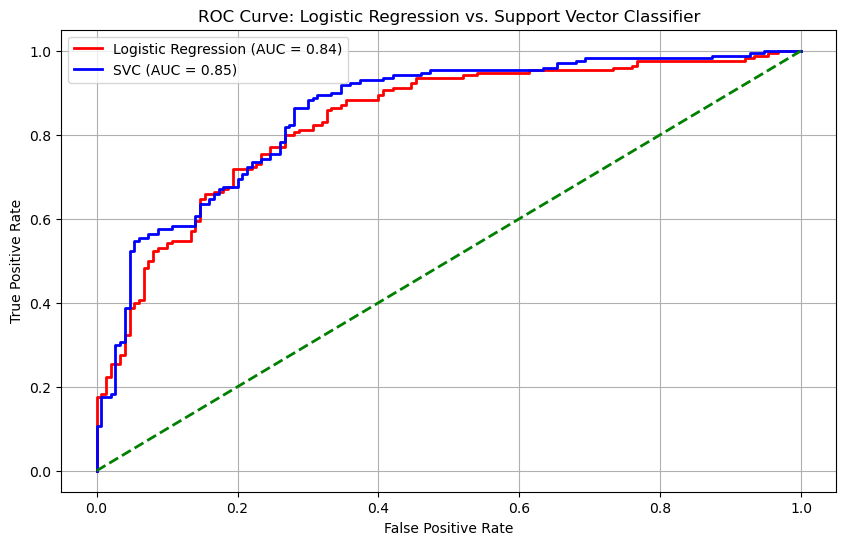

In [14]:
# Needed library, 
from sklearn.metrics import roc_curve, auc

# Logistic Regression, 
y_pred_log = log_reg.predict_proba(X_test_scaled)[:, 1] # Estimates for the positive class (is 1) [:, 1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log, tpr_log)

# svc, 
y_wine_scores = svc_clf.decision_function(X_test)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_wine_scores)
roc_auc_svc = auc(fpr_svc,tpr_svc)

# plot, 
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(fpr_log, tpr_log, c= 'red', linewidth=2, label = f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_svc, tpr_svc, c='blue', linewidth=2, label = f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression vs. Support Vector Classifier')
plt.legend()

In [15]:
# ROC AUC scores, 
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_svc = auc(fpr_svc,tpr_svc)

# Display, 
print('='*50)
print('roc_auc_log =', round(roc_auc_log, 4) )
print('='*50)
print('roc_auc_svc =', round(roc_auc_svc, 4) )
print('='*50)
print('Difference =', round(roc_auc_svc-roc_auc_log,4))
print('='*50)

roc_auc_log = 0.8352
roc_auc_svc = 0.8537
Difference = 0.0185


---

**<font color ='red'>Interpretation:</font>**

Our models performed well in distinguishing between "good" and "bad" wines that is, both curves have a score that indicates far from random classifying (if roc_auc were to be 0.5 we consider this incapable of discriminative ability). However, the Support Vector Classifier performed better than Logistic Regression but the difference is negligible $(\text{(roc auc svc) - (roc auc log)}=0.0185)$. 


---